# Fact or Fake?

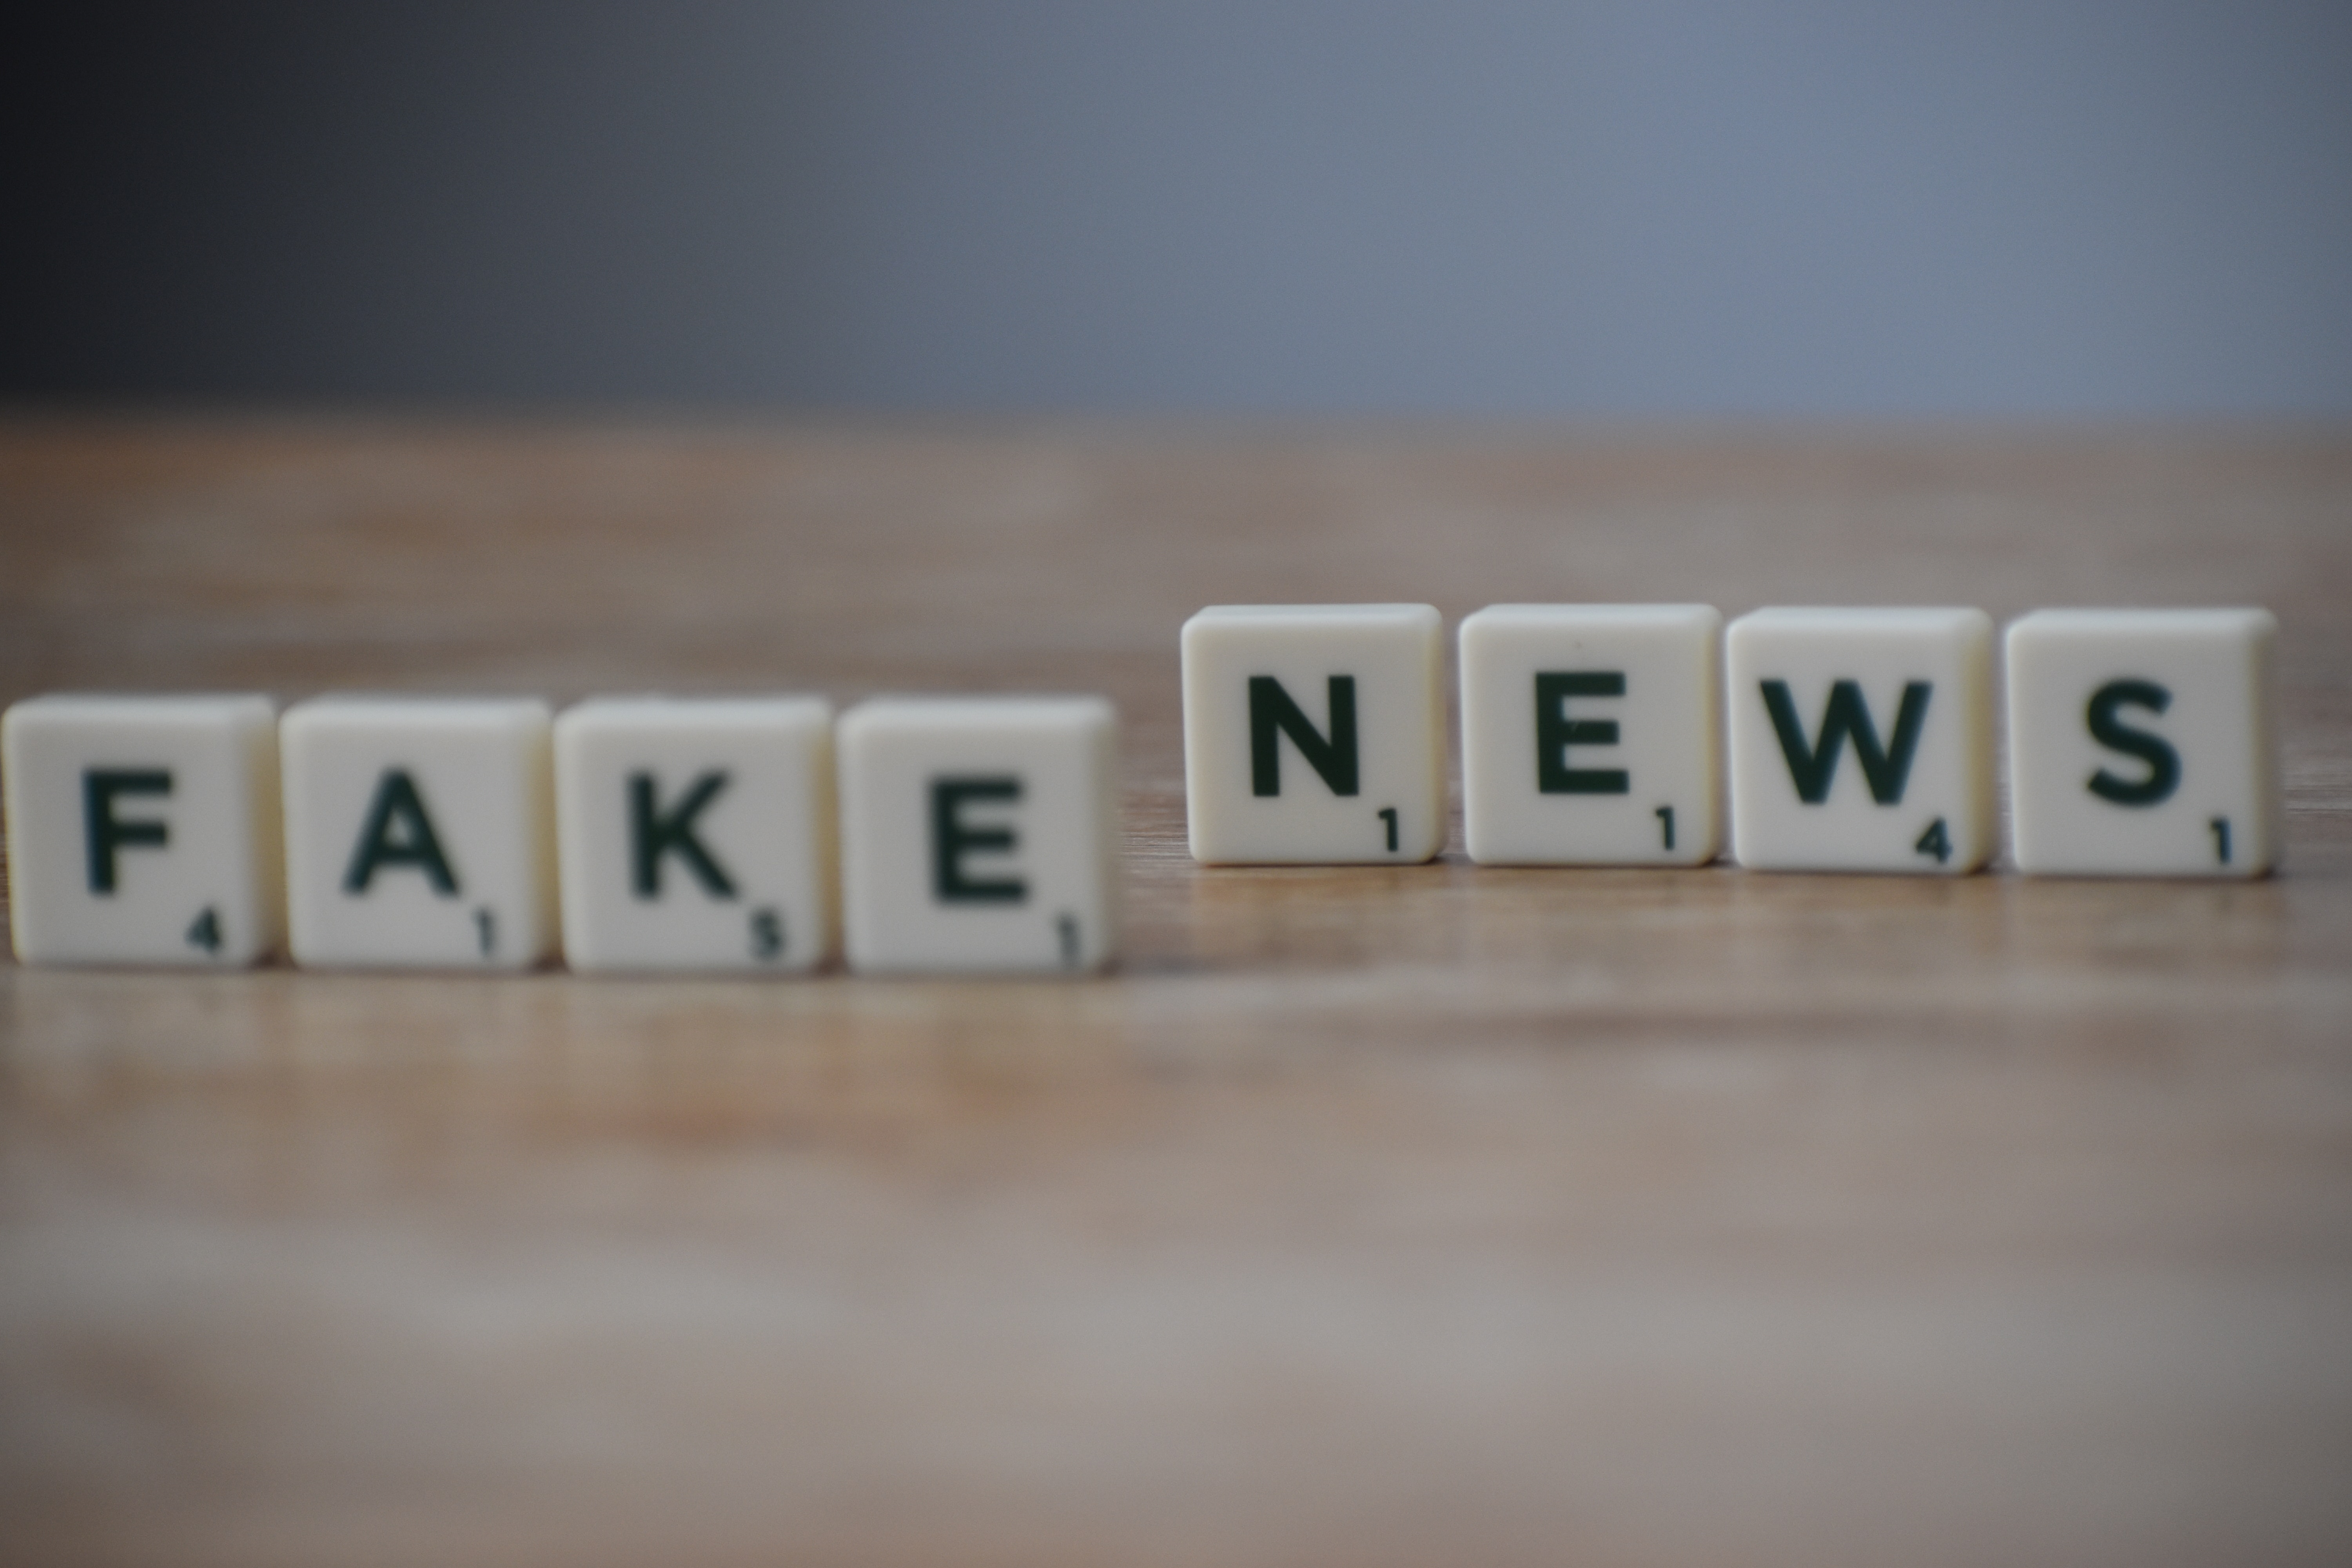

At least after the precidency of Donald Trump the world had heard about "Fake News" - although some misleading information may have been spread - the term captures a quite important issue - the spread of unconfirmed, in some cases even fictional "information" on real people, organisations, countries, etc.

The following codes tries solve the problem of detecting fake news via Deep Learning



Link to the used Dataset:

https://github.com/joolsa/fake_real_news_dataset


The Dataset was provided by George McIntire - a Data Scientist from Berkeley.

https://github.com/GeorgeMcIntire

    

## STEP 1: Preprocession


**Load the Data**
 - Load Data
 - Print Overview


In [55]:
import pandas as pd
df = pd.read_csv('fake_or_real_news.csv')

print(df)

      Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinter








**Beautify Input data**
 - Remove unneccessary columns
 - Rename columns



df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [56]:
df = df.drop(df.columns[[0]], axis=1)
df = df.drop(df.columns[[0]], axis=1)

df = df.rename(columns = {"v1":"type", "v2":"text"})
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


**Removing missing Values**
 - Checking the Shape
 - Removing any Missing Values
 

In [57]:
print(df.shape)
df = df.dropna(how="any", axis=1)
print(df.shape)


(6335, 2)
(6335, 2)


In [58]:
df.head().style

**Installing Spacy and loading a pretrained model**
 - Spacy is a powerful NLP library that can help us clean our texts
 - It work on a pretrained model that recognize parts of the natural language (like a noun)
 
 for more informations see: https://spacy.io/models/en

In [59]:
#!pip install spacy
#!python -m spacy download en_core_web_md

import spacy
nlp=spacy.load('en_core_web_md')

In [60]:
#!pip install inflect
import inflect
inflect = inflect.engine()

word = "bars"

word='bananas'
print("The plural of ", word, " is ", inflect.plural(word))
print("Is Word plural? ", word, " is ", inflect.singular_noun(word))

The plural of  bananas  is  banana
Is Word plural?  bananas  is  banana


**Cleaning our text**
 1. Do Tokenization (splitting the sentence into sub elements) and part of speech tagging (detecting if token in noun word etc.)
 2. Convert all nouns to singular nouns (like bananas -> bananas)
 3. Do Lemmatization for all verbs (like was -> is)
 4. remove all punctuation
 5. removing stop words - (currently commented out because it deterioated the performance of the model later)

In [61]:
df['cleaned_text']=''


d=0
c=''
for x in df['text']:
    
    #step 1 do the tokenization
    tokenized_text = nlp(str(x).lstrip().rstrip())
    for token in tokenized_text:

        #step 1
        #use the part of speach tagging
        #only nouns should be singularized 
        if (token.tag_ == "NN" or token.tag_ == "NE"):
            
            
            #check if the noun is already ingular
            #if so nothing will happen
            if inflect.singular_noun(str(token)) == False:
                c+=" "+str(token)
            else:  
                
                #step 2
                #singularize a plural noun
                singularized_text = inflect.plural(str(token))
                c+=" "+singularized_text
        else:
            #step 3
            #if token is verb do lemmatization
            if token.pos_ == "VERB" or token.pos_ == "AUX":

                #do lemmatization also for verb 
                c+=" "+str(token.lemma_)
            else:
                #step 4 & 5
                #remove token that are recognized as punctuation or stopwords
                if token.is_punct == True or token.is_stop == True:
                    pass

                else:
                    c+=" "+str(token)               
            
    
    #store the results in the new table
    df['cleaned_text'].iloc[d]=c
    c=''
    d+=1
    
df.head(10).style

## Step 2: Basic Analysis

**Distribution Analysis**
 - Plotting Categories
 

In [62]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['label'])

df['type_encoded'] = encoder.transform(df['label'])
df.head()

,text,label,cleaned_text,type_encoded
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield Shillman Journalism Fellow ...,0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumble...,0
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,U.S. Secretary State John F. Kerry say Monday...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Kaydee King @KaydeeKing November 9 2016 lesso...,0
4,It's primary day in New York and front-runners...,REAL,be primary day New York runners Hillary Clint...,1


Number of Real-News: 3164
Number of Fake-News: 3171


<AxesSubplot:>

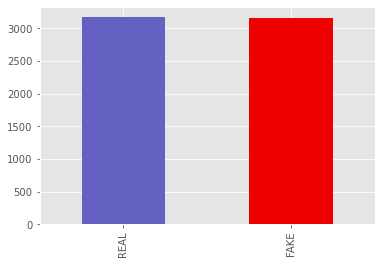

In [63]:
import matplotlib.pyplot as plt



print("Number of Real-News: {}\nNumber of Fake-News: {}".format(df['label'].value_counts()[1],df['label'].value_counts()[0]))
df['label'].value_counts().plot.bar(color=['#6461c2', '#ee0000'])



**Adding Text Length**
 - Calculating Text Length
 - Plotting Results with Distribution for each Class (Real News or Fake News)
 

In [64]:
df['length'] = df['text'].apply(lambda x: len(x.split(' ')))
df.head()

,text,label,cleaned_text,type_encoded,length
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield Shillman Journalism Fellow ...,0,1298
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumble...,0,446
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,U.S. Secretary State John F. Kerry say Monday...,1,423
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Kaydee King @KaydeeKing November 9 2016 lesso...,0,404
4,It's primary day in New York and front-runners...,REAL,be primary day New York runners Hillary Clint...,1,307


Text(0.5, 0, 'Message Length')

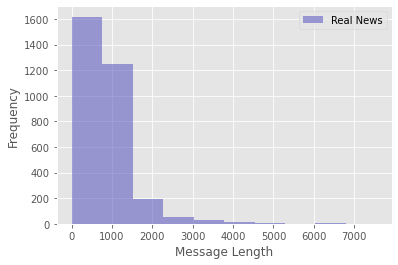

In [65]:
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use("ggplot")
plt.figure(figsize=(6, 4))

df[df.label=='REAL'].length.plot(
    kind='hist', color='#6461c2',
    label='Real News', alpha=0.6)
#df[df.label=='FAKE'].length.plot(
#    kind='hist', color='#ee0000', 
#    label='Fake New', alpha=0.6)

plt.legend()
plt.xlabel("Message Length")


Text(0.5, 0, 'Message Length')

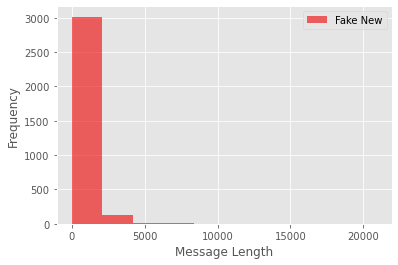

In [66]:
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use("ggplot")
plt.figure(figsize=(6, 4))

#df[df.label=='REAL'].length.plot(
#    kind='hist', color='#6461c2',
#    label='Real News', alpha=0.6)
df[df.label=='FAKE'].length.plot(
    kind='hist', color='#ee0000', 
    label='Fake New', alpha=0.6)

plt.legend()
plt.xlabel("Message Length")


In [67]:
#fake news tend to be shorter

**Creating a Word Cloud**
 - Calculating most frequent words per category
 - Graphically representing them

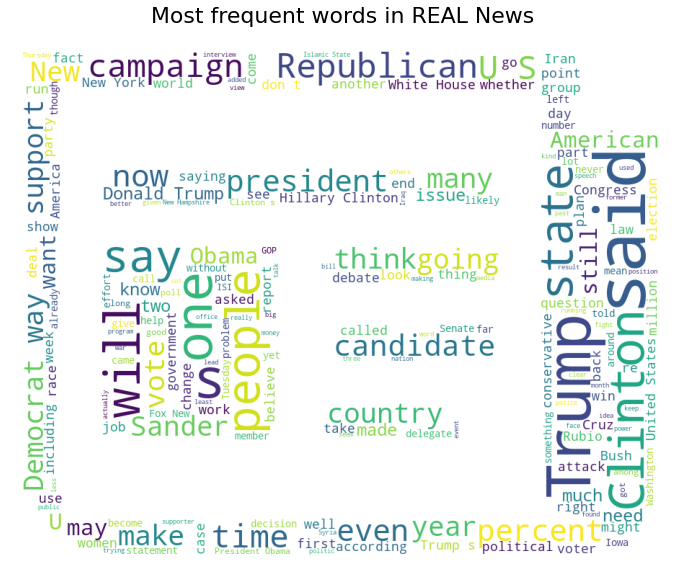

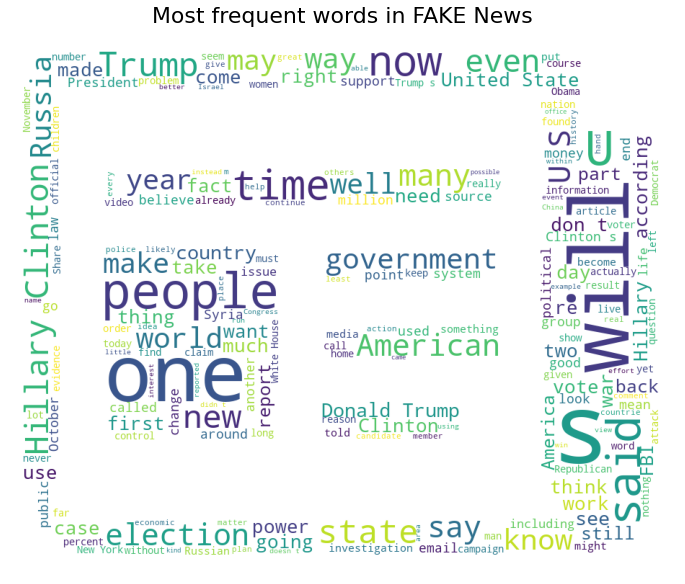

In [68]:
from PIL import Image
!pip install wordcloud
from wordcloud import WordCloud
import numpy as np
sms_picture = np.array(Image.open('news.jpg'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=sms_picture,
)
wc.generate(' '.join(text for text in df.loc[df['label'] == 'REAL', 'text']))
plt.figure(figsize=(18,10))
plt.title('Most frequent words in REAL News', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=sms_picture,
)
wc.generate(' '.join(text for text in df.loc[df['label'] == 'FAKE', 'text']))
plt.figure(figsize=(18,10))
plt.title('Most frequent words in FAKE News', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

## Step 3: Deep Learning

In [69]:
#importing the necessary data

import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SimpleRNN
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Model
from keras.utils import to_categorical
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

**Load Target Variable \+ Add Encoding**
 - will be used for further analysis

In [70]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['label'])

df['type_encoded'] = encoder.transform(df['label'])
df.head()

,text,label,cleaned_text,type_encoded,length
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield Shillman Journalism Fellow ...,0,1298
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumble...,0,446
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,U.S. Secretary State John F. Kerry say Monday...,1,423
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Kaydee King @KaydeeKing November 9 2016 lesso...,0,404
4,It's primary day in New York and front-runners...,REAL,be primary day New York runners Hillary Clint...,1,307


**Load Predictor Variable + Add Vectorization**
 - Create a word matrix (needed for traing the model)
 - Create test and training set (In this case a split of 80 to 20)

In [71]:
#define x and y axis of the matrix we build later
X = df['cleaned_text']
Y = df['type_encoded']
print(len(X), len(Y))

Y = encoder.fit_transform(Y)
Y = Y.reshape(-1,1)

#split into training and test set
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.20)

#initialize vectorization
max_words = 10000
max_len = 200
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)



6335 6335


**Defining Model function**
 - setting now a up a different model with more layer
 - with the target of achieving a better accuracy in the end

In [72]:

def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words, 50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [73]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 200)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 50)           500000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

**Training the model**
 - With 10 different epcoch
 - a Training-Validation Split of 80-20
 - 10 different Epochs
 - and an Early Stop - Condition - which should stop the model 
 compuatation when no significant improvment can be achieved in the next iteration

In [74]:


training_data = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.000000001)])



Epoch 1/10
32/32 [==============================] - 6s 119ms/step - loss: 0.6606 - accuracy: 0.6190 - val_loss: 0.4205 - val_accuracy: 0.8126
Epoch 2/10
32/32 [==============================] - 3s 102ms/step - loss: 0.3003 - accuracy: 0.8850 - val_loss: 0.2597 - val_accuracy: 0.8945
Epoch 3/10
32/32 [==============================] - 3s 102ms/step - loss: 0.1519 - accuracy: 0.9499 - val_loss: 0.2656 - val_accuracy: 0.9211


**Visualizing the Training Progress**
 - Visualizing how the model performed on training and validation set 
 - over the course of the learning

In [75]:
import matplotlib.pyplot as plt

def plot_training(training_data,train,validation):
    plt.style.use('ggplot')
    plt.plot(training_data.history[train], color='#6461c2')
    plt.plot(training_data.history[validation], color='#ee0000')
    plt.title('Learning Progress')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

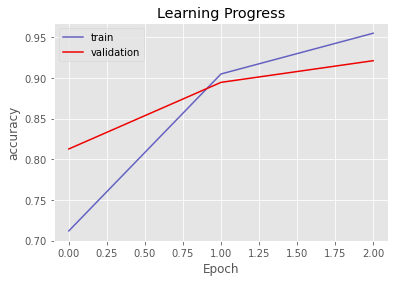

In [76]:
plot_training(training_data, 'accuracy', 'val_accuracy')

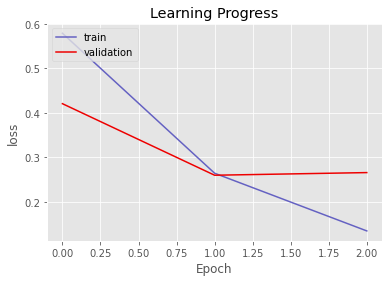

In [77]:
plot_training(training_data, 'loss', 'val_loss')